In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

La Transformada de Fourier Discreta (DFT, por sus siglas en inglés) se define como el producto interno (también conocido como producto punto) entre la señal y el vector base de Fourier,

$$
\mathbf{X[k] = \langle w^{(k)}, x \rangle  = \sum_{n = 0}^{N-1} x[n] e^{-i \frac{2\pi}{N} nk}, 
                                                                                     \quad k= 0,\ldots, N-1 }, 
                                                                                     \qquad \text Ec.2                                                                                  
$$

Donde:

   * $\mathbf{X[k]}$ = Transformada discreta de Fourier
   * $\mathbf{x[n]}$ = señal
   * $\mathbf{N}$ = número de muestras
   * $\mathbf{k}$ = frecuencia circular (0 [Hz] a N-1 [Hz])
   
   

Cada uno los términos complejos de la suma equivalente al producto punto, se denomina "coeficiente de Fourier". 


En el caso general, los coeficientes $X[\mathit{k}]$ son números complejos. Para interpretar los coeficientes, es conveniente representar su magnitud como $|X[\mathit{k}]|$ y la fase $\measuredangle X[\mathit{k}]$, envuelta en el intervalo $[- \pi, \pi]$. 

## Onda sinusoidad

Sea una onda sinusoidad 1D, defina como:
$$
u(x,t) = A \cos (\mathit{k}x\pm\omega t), \qquad \text Ec. 3
$$

donde:

   * $\mathit{k} = \mathbf{\frac{2\pi}{\lambda}}$, número de onda o propagación
   * $\mathbf{\omega} = 2\pi f$, frecuencia angular
  
Caso 1. Onda sinusoidad en función del tiempo para $x = 0$, 
$$
\left.u(x,t) \right|_{x=0} = u(t) = A \cos(\pm \omega t) = A \cos(\pm 2\pi f t),  \qquad \text Ec. 3a
$$
Caso 2. Onda sinusoidad en función del espacio para $t = 0$, 
$$
\left.u(x,t) \right|_{t=0} = u(x) = A \cos(\mathit{k}x) = A \cos \left(\frac{2\pi}{\lambda} x \right),  \qquad \text Ec. 3b
$$

#### Frecuencia temporal y espacial de muetreo:
$$
f_{nyquist}(t) = \frac{1}{2 \Delta t}, \quad f_{nyquist}(x) = \frac{1}{2 \Delta t}
$$

#### Caso 1: función temporal
* $t_{1, \ldots, n}$: serie de tiempo n-enésima
* $dt_{1, \ldots, n}$: intervalo de muestreo temporal n-enésimo
* $n_{1, \ldots, n}$: longitud temporal n-enésimo
* $f_{1, \ldots, n}$: frecuencia circular n-enésima

In [2]:
############################
#Dominio temporal
############################
dt = 0.001
t = np.arange(0, 10, dt)
nt = t.size
f = 8
############################
#Dominio espacial
############################
dx = 0.001
x = np.arange(0, 10, dx)
nx = x.size
v = 2
lw = v/f
############################
#Frecuencua de Nyquist
############################
fny1 = 1/(2*dt)
fny2 = 1/(2*dx)

In [3]:
print('Frecuencia Nyquist temporal =', fny1, '[Hz]')
print('Frecuencia Nyquist espacial =', fny2, '[1/m]')
print ('Frecuencia circular =', f, '[Hz]')
print ('Longitud de onda =',lw, '[m]')
print ('Velocidad de fase =',v, '[m/s]')

Frecuencia Nyquist temporal = 500.0 [Hz]
Frecuencia Nyquist espacial = 500.0 [1/m]
Frecuencia circular = 8 [Hz]
Longitud de onda = 0.25 [m]
Velocidad de fase = 2 [m/s]


In [4]:
signalt = np.cos(-2*3.1416*f*t)
signalx = np.cos((2*3.1416/lw)*x)

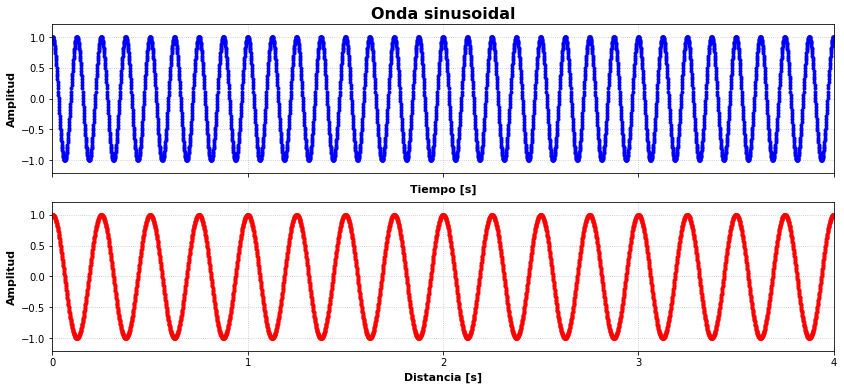

In [5]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
_ = plt.plot(t,signalt, 'b.', markersize = 6)
_ = plt.plot(t,signalt, '--b', lw = 1.2)
_ = plt.xlim(0,4)
_ = plt.ylim(-1.2,1.2)
_ = plt.xticks(np.arange(5), [''])
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.title('Onda sinusoidal', fontsize = 16, weight = 'semibold')

plt.subplot(2,1,2)
_ = plt.plot(x,signalx, '.r', markersize = 6)
_ = plt.plot(x,signalx, '--r', lw = 1.2)
_ = plt.xlim(0,4)
_ = plt.ylim(-1.2,1.2)
_ = plt.xticks(np.arange(5))
_ = plt.xlabel('Distancia [s]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [6]:
#Transformada de Fourier-Espectro de amplitud
St = np.abs(np.fft.rfft(signalt))
freq1 = np.fft.rfftfreq(nt, d = dt)
Sx = np.abs(np.fft.rfft(signalx))
freq2 = np.fft.rfftfreq(nx, d = dx)
#Espectro de fase
Stf = np.angle(np.fft.rfft(signalt), deg = False)
Sxf = np.angle(np.fft.rfft(signalx), deg = False)

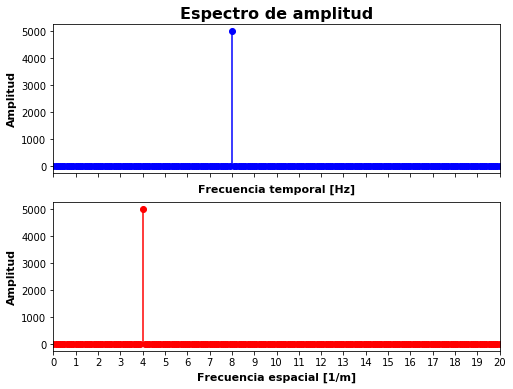

In [7]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.stem(freq1, St, markerfmt = 'bo', linefmt = 'b', basefmt = 'b')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21), [''])
_ = plt.xlabel('Frecuencia temporal [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')

plt.subplot(2,1,2)
_ = plt.stem(freq2, Sx, markerfmt = 'ro', linefmt = 'r', basefmt = 'r')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia espacial [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')


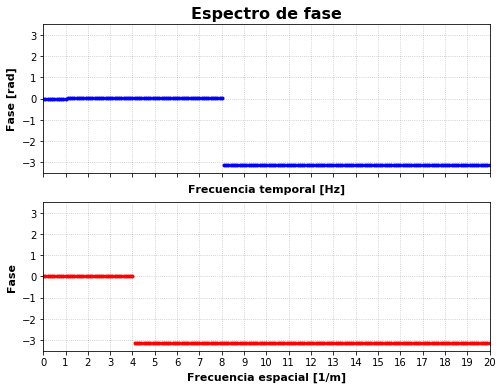

In [8]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.plot(freq1, Stf,  'ob', markersize = 3, lw = 0.5)
_ = plt.xlim(0,20)
_ = plt.ylim(-3.5,3.5)
_ = plt.xticks(np.arange(21), [''])
_ = plt.xlabel('Frecuencia temporal [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de fase', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(freq2, Sxf,  'or', markersize = 3, lw = 0.5)
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.ylim(-3.5,3.5)
_ = plt.xlabel('Frecuencia espacial [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

## Transformada de Fourier con múltiples ondas sinusoidales sin y con ruido aleatorio

In [9]:
#Parámetros
dt = 0.001
t = np.arange(0, 10, dt)
pi = 3.1416
n = t.size
f = [3,1,7,12,18]
a = [10,2,5,8,3]
p = [0, pi/4, -pi, pi/2, pi]

In [10]:
#Función sin ruido
swave = np.zeros(n)
for m in np.arange(0, 5):
    swave = swave + a[m]*np.sin(2*pi*f[m]*t+p[m])

In [11]:
#Función con ruido
swaveN = swave + np.random.randn(n)*20

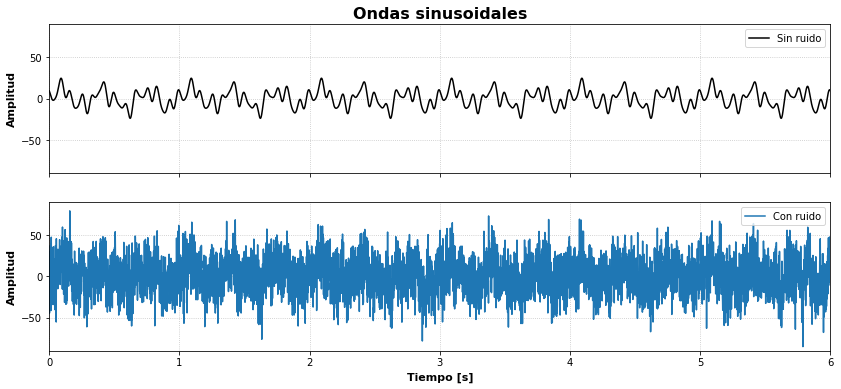

In [12]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
_ = plt.plot(t, swave, 'k', label = 'Sin ruido')
_ = plt.xlim(0,6)
_ = plt.ylim(-90,90)
_ = plt.xticks(np.arange(7), [''])
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.title('Ondas sinusoidales', fontsize = 16, weight = 'semibold')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(t, swaveN, label = 'Con ruido')
_ = plt.xlim(0,6)
_ = plt.ylim(-90,90)
_ = plt.xticks(np.arange(7))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

In [13]:
#Transformada de Fourier-Espectro de amplitud
sW = np.abs(np.fft.rfft(swave))
sWN = np.abs(np.fft.rfft(swaveN))
f = np.fft.rfftfreq(n, d = dt)
#Espectro de fase
sF = np.angle(np.fft.rfft(swave))
sFN = np.angle(np.fft.rfft(swaveN))

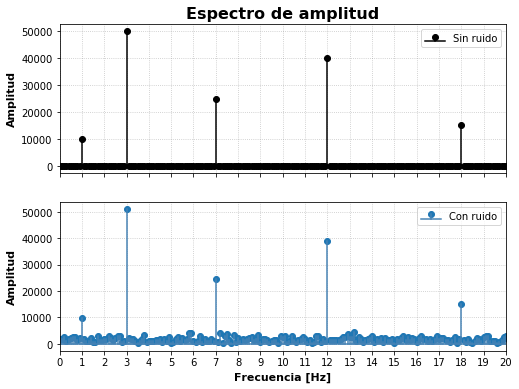

In [14]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.stem(f, sW, markerfmt = 'ko', linefmt = 'k', basefmt = 'k', label = 'Sin ruido')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21), [''])
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.stem(f, sWN, linefmt = 'steelblue', basefmt = 'steelblue', label = 'Con ruido')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

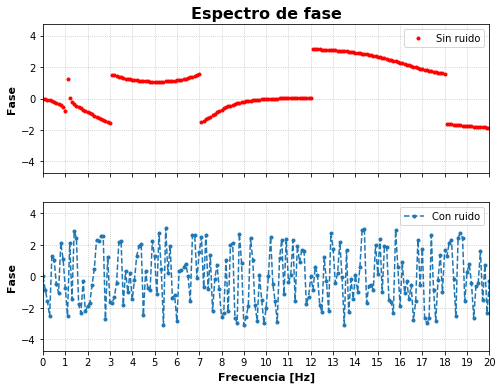

In [15]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.plot(f, sF, '.r', label = 'Sin ruido')
_ = plt.xlim(0,20)
_ = plt.ylim(-pi*1.5,pi*1.5)
_ = plt.xticks(np.arange(21), [''])
_ = plt.ylabel('Fase', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de fase', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(f, sFN,'.--', label = 'Con ruido')
_ = plt.xlim(0,20)
_ = plt.ylim(-pi*1.5,pi*1.5)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

## Transformada de Fourier de una traza sísmica

In [16]:
reg = pd.read_csv('well_l30.csv')
seis_time = pd.read_csv('seismic_amplitude_time.csv')
pot_od = pd.read_csv('pot_seismic_amplitude_time.csv')
potdb_od = pd.read_csv('potdb_seismic_amplitude_time.csv')
print('Dominio profundidad:', reg.columns)
print('Dominio tiempo:', seis_time.columns)
print('Potencia OD:', pot_od.columns)
print('Potencia OD:', potdb_od.columns)

Dominio profundidad: Index(['depth', 'amplitud'], dtype='object')
Dominio tiempo: Index(['time', 'seis_amp'], dtype='object')
Potencia OD: Index(['freq', 'pot'], dtype='object')
Potencia OD: Index(['freq', 'pot_db'], dtype='object')


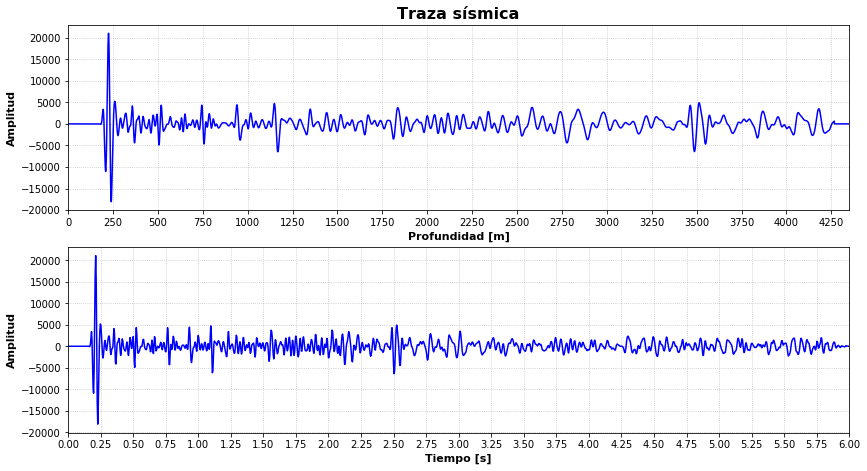

In [17]:
plt.figure(figsize=(14,7.5))

plt.subplot(2,1,1)
_ = plt.plot(reg['depth'],reg['amplitud'], 'b')
_ = plt.xlim(0,4350)
_ = plt.xticks(np.arange(0,4350,250))
_ = plt.xlabel('Profundidad [m]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.title('Traza sísmica', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')


plt.subplot(2,1,2)
_ = plt.plot(seis_time['time'],seis_time['seis_amp'], 'b')
_ = plt.xlim(0,6)
_ = plt.xticks(np.arange(0,6.025,0.25))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')


In [18]:
#Transformada de Fourier espacial
seisX = np.abs(np.fft.rfft(reg['amplitud']))
fX = np.fft.rfftfreq(reg['amplitud'].size, d = 0.15)

In [19]:
#Transformada de Fourier temporal
seisT = np.abs(np.fft.rfft(seis_time['seis_amp']))
fT = np.fft.rfftfreq(seis_time['time'].size, d = 0.004)

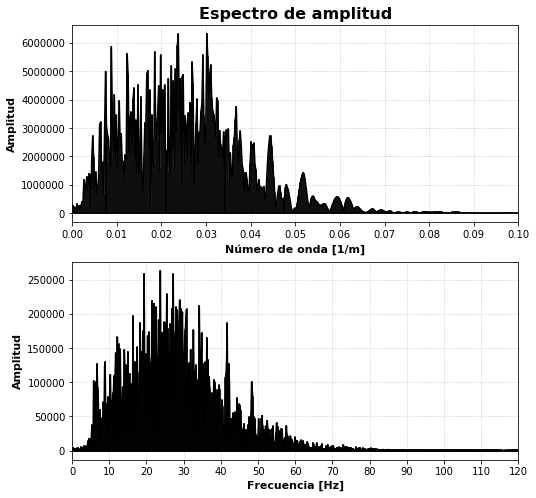

In [20]:
plt.figure(figsize=(8,8)) 

plt.subplot(2,1,1)
_ = plt.stem(fX, seisX, markerfmt = 'k', linefmt = 'k', basefmt = 'k')
_ = plt.xlim(0,0.1)
_ = plt.xticks(np.arange(0, 0.11, 0.01))
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Número de onda [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

plt.subplot(2,1,2)
_ = plt.stem(fT, seisT, markerfmt = 'k', linefmt = 'k', basefmt = 'k')
_ = plt.xlim(0,120)
_ = plt.xticks(np.arange(0,130,10))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

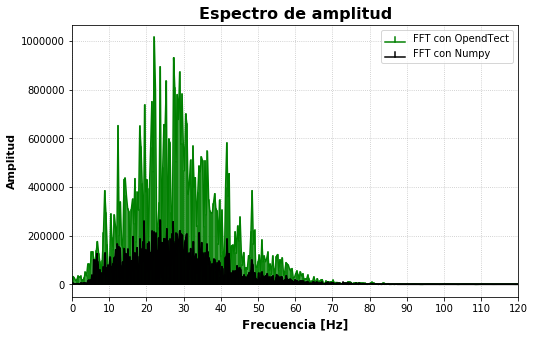

In [21]:
plt.figure(figsize=(8,5)) 

_ = plt.stem(pot_od['freq'], pot_od['pot'], markerfmt = 'green', linefmt = 'green', basefmt = 'green',
             label = 'FFT con OpendTect')
_ = plt.stem(fT, seisT, markerfmt = 'k', linefmt = 'k', basefmt = 'k', label = 'FFT con Numpy')
_ = plt.xlim(0,120)
_ = plt.legend()
_ = plt.xticks(np.arange(0,130,10))
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 12, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

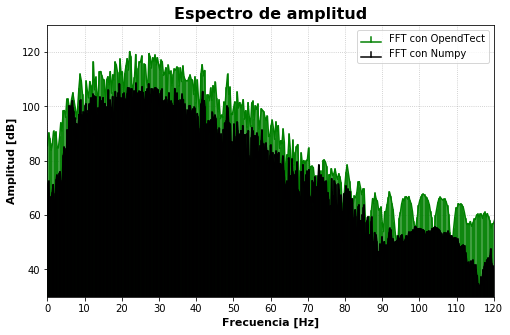

In [22]:
plt.figure(figsize=(8,5)) 


_ = plt.stem(pot_od['freq'], 20*np.log10(pot_od['pot']), markerfmt = 'green', linefmt = 'green', basefmt = 'green', 
             label = 'FFT con OpendTect')
_ = plt.stem(fT, 20*np.log10(seisT), markerfmt = 'k', linefmt = 'k', basefmt = 'k', label = 'FFT con Numpy')
_ = plt.xlim(0,120)
_ = plt.ylim(30,130)
_ = plt.xticks(np.arange(0,130,10))
_ = plt.legend()
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud [dB]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

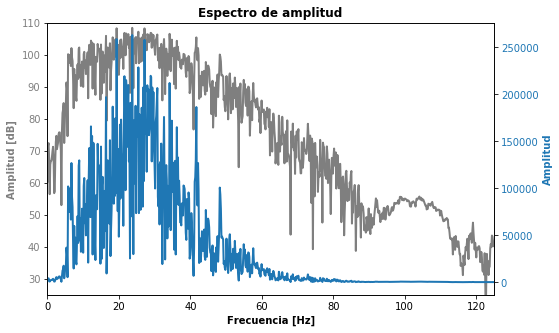

In [23]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:grey'
ax1.set_xlabel('Frecuencia [Hz]', fontsize = 10, weight = 'semibold')
ax1.set_ylabel('Amplitud [dB]', color = color, fontsize = 10, weight = 'semibold')
ax1.plot(fT, 20*np.log10(seisT), color = color, lw = 2)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(25,110)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Amplitud', fontsize = 10, color = color, weight = 'semibold')
ax2.plot(fT, seisT, lw = 2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Espectro de amplitud', fontsize=12, weight = 'semibold')
plt.xlim(0,125)

plt.show()

In [24]:
esp = signal.medfilt(seisT,5)
esp_db = signal.medfilt(20*np.log10(seisT),5)

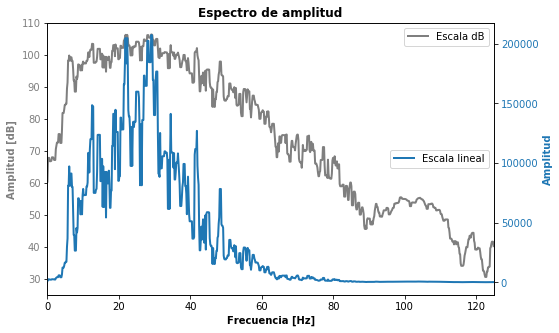

In [25]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:grey'
ax1.set_xlabel('Frecuencia [Hz]', fontsize = 10, weight = 'semibold')
ax1.set_ylabel('Amplitud [dB]', color = color, fontsize = 10, weight = 'semibold')
ax1.plot(fT, esp_db, color = color, lw = 2, label = 'Escala dB')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper right')
plt.ylim(25,110)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Amplitud', fontsize = 10, color = color, weight = 'semibold')
ax2.plot(fT, esp, lw = 2, label = 'Escala lineal')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'center right')
plt.title('Espectro de amplitud', fontsize=12, weight = 'semibold')
plt.xlim(0,125)

plt.show()